##1. Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
import matplotlib.pyplot as plt

##2. Análise do faturamento


In [3]:
from urllib.request import urlopen
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from tabulate import tabulate

url1 = 'https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/praticando-python-data-science-challenge-alura-store/dados/loja_1.csv'
url2 = 'https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/praticando-python-data-science-challenge-alura-store/dados/loja_2.csv'
url3 = 'https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/praticando-python-data-science-challenge-alura-store/dados/loja_3.csv'
url4 = 'https://raw.githubusercontent.com/rafaelreisramos/oracle-one/refs/heads/main/praticando-python-data-science-challenge-alura-store/dados/loja_4.csv'

def load_data_from_url(url):
    data = []
    with urlopen(url) as response:
        lines = response.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lines)
        for line in reader:
            data.append(line)
        return data

def load_store_data(*urls):
    store_data = []
    for url in urls:
        data = load_data_from_url(url)
        store_data.append(data)
    return store_data

store_data = load_store_data(url1, url2, url3, url4)
NUM_LOJAS = len(store_data)

# função auxiliar para união de dicionários
def merge_dicts(*dicts):
    merged = {}
    for d in dicts:
        for key, value in d.items():
            if key not in merged:
                # Se ainda não existe, adiciona o valor diretamente
                merged[key] = value if isinstance(value, list) else [value]
            else:
                # Se já existe, combina os valores
                if not isinstance(merged[key], list):
                    merged[key] = [merged[key]]
                if isinstance(value, list):
                    merged[key].extend(value)
                else:
                    merged[key].append(value)
    return merged

# função auxiliar para imprimir dados em formato de tabelas
def imprime_tabela(dados):
    cabecalhos = [''] + list(dados.keys())
    linhas = [[f'Loja {i+1}'] + [dados[key][i] for key in dados] for i in range(NUM_LOJAS)]
    print(tabulate(linhas, headers=cabecalhos, floatfmt=".2f", tablefmt="grid"))

###2.1. Cálculo do Faturamento Total

In [4]:
def calcula_faturamento(data):
    faturamento = 0
    for line in data:
        faturamento += float(line['Preço'])
    return faturamento

faturamentos_lojas = []
for i, store in enumerate(store_data):
    faturamento = calcula_faturamento(store)
    print(f'O faturamento da loja {i+1} foi de R$ {faturamento:.2f}')
    faturamentos_lojas.append(faturamento)

O faturamento da loja 1 foi de R$ 1534509.12
O faturamento da loja 2 foi de R$ 1488459.06
O faturamento da loja 3 foi de R$ 1464025.03
O faturamento da loja 4 foi de R$ 1384497.58


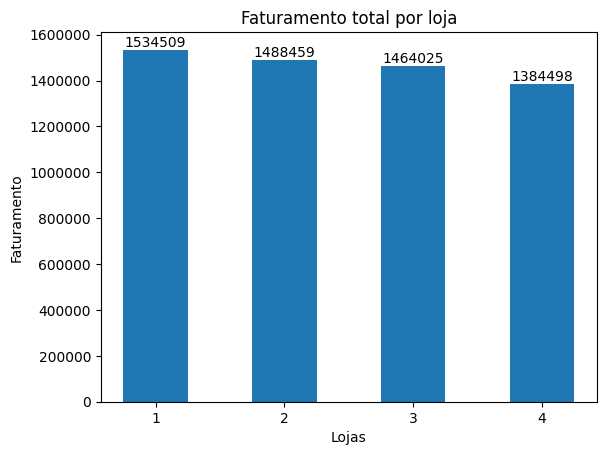

In [5]:
fig, ax = plt.subplots()

rects = ax.bar(['1', '2', '3', '4'], faturamentos_lojas, width=0.5)
ax.set_xlabel("Lojas")
ax.set_ylabel("Faturamento")
ax.bar_label(rects, fmt='%.0f', label_type='edge')
ax.set_title("Faturamento total por loja")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

###2.2 Cálculo dos Faturamentos Anuais

In [6]:
def calcula_faturamentos_anuais_por_loja(store):
    faturamento = {}
    for venda in store:
        ano = str(datetime.strptime(venda['Data da Compra'], "%d/%m/%Y").year)
        if ano not in faturamento:
            faturamento[ano] = 0
        faturamento[ano] += float(venda['Preço'])
    return dict(sorted(faturamento.items()))

def calcula_faturamentos_anuais(data):
    faturamentos = {}
    for i, store in enumerate(data):
        faturamento_anual = calcula_faturamentos_anuais_por_loja(store)
        faturamentos = merge_dicts(faturamentos, faturamento_anual)
    return faturamentos

def exibe_faturamento_anual(faturamentos_anuais, ano):
    print(f'Ano: {ano}')
    for i, income in enumerate(faturamentos_anuais):
        print(f'O faturamento da loja {i+1} foi de R$ {income[str(ano)]:.2f}')
    print('\n')

faturamentos_anuais = calcula_faturamentos_anuais(store_data)
imprime_tabela(faturamentos_anuais)

+--------+-----------+-----------+-----------+-----------+
|        |      2020 |      2021 |      2022 |      2023 |
+========+===========+===========+===========+===========+
| Loja 1 | 491911.51 | 482829.91 | 422086.24 | 137681.46 |
+--------+-----------+-----------+-----------+-----------+
| Loja 2 | 427288.25 | 468288.89 | 477635.56 | 115246.36 |
+--------+-----------+-----------+-----------+-----------+
| Loja 3 | 428943.09 | 483938.91 | 467250.70 |  83892.33 |
+--------+-----------+-----------+-----------+-----------+
| Loja 4 | 441129.52 | 463763.27 | 402961.23 |  76643.56 |
+--------+-----------+-----------+-----------+-----------+


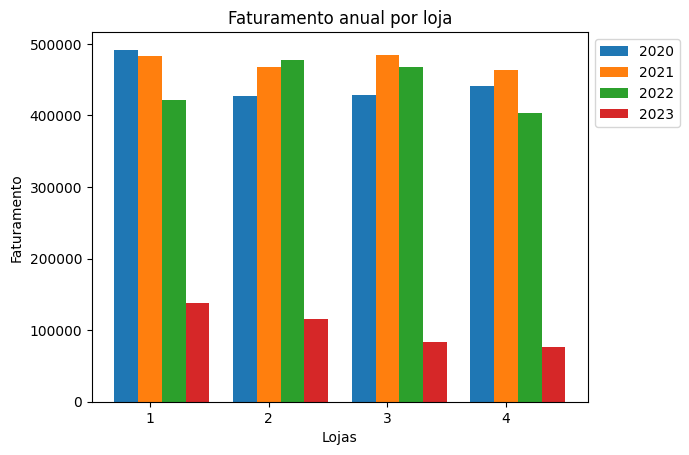

In [7]:
lojas = ['1', '2', '3', '4']
x = list(range(len(lojas)))
width = 0.2
multiplier = 0

fig, ax = plt.subplots()

for ano, faturamento in faturamentos_anuais.items():
    offset = width * multiplier
    rects = ax.bar([xi + offset for xi in x], faturamento, width, label=ano)
    multiplier += 1

ax.set_ylabel('Faturamento')
ax.set_xlabel('Lojas')
ax.set_title('Faturamento anual por loja')
ax.set_xticks([xi + width for xi in x], lojas)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

###2.3 Cálculo do faturamento por Região

In [8]:
def calcula_faturamento_por_UF(store_data):
    stores_income_per_uf = []
    for store in store_data:
        products = {}
        for sale in store:
            key = sale['Local da compra']
            if key not in products:
                products[key] = 0
            products[key] += float(sale['Preço'])
        ufs = sorted(products.keys())
        stores_income_per_uf.append({uf: products[uf] for uf in ufs})

    return stores_income_per_uf

regioes = {
    'N': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR'],
    'NE': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'CO': ['DF', 'GO', 'MS', 'MT', 'TO'],
    'SE': ['ES', 'MG', 'RJ', 'SP'],
    'S': ['PR', 'RS', 'SC']
}

def calcula_faturamento_por_regiao(store):
    income = {}
    for regiao, estados in regioes.items():
        if regiao not in income:
            income[regiao] = 0
        for sale in store:
            if sale['Local da compra'] in estados:
                income[regiao] += float(sale['Preço'])
    return income

def calcula_faturamento_regioes(data):
    faturamentos = {}
    for i, store in enumerate(data):
        faturamento_regiao = calcula_faturamento_por_regiao(store)
        faturamentos = merge_dicts(faturamentos, faturamento_regiao)
    return faturamentos

faturamento_por_regiao = calcula_faturamento_regioes(store_data)
print('Faturamento por região')
imprime_tabela(faturamento_por_regiao)

Faturamento por região
+--------+----------+-----------+-----------+------------+-----------+
|        |        N |        NE |        CO |         SE |         S |
+========+==========+===========+===========+============+===========+
| Loja 1 | 23511.36 | 130540.80 | 117027.38 | 1001106.78 | 262322.80 |
+--------+----------+-----------+-----------+------------+-----------+
| Loja 2 | 13593.83 | 128670.11 |  94811.30 | 1052725.53 | 198658.29 |
+--------+----------+-----------+-----------+------------+-----------+
| Loja 3 | 22997.43 | 136903.21 | 106878.67 | 1015297.00 | 181948.72 |
+--------+----------+-----------+-----------+------------+-----------+
| Loja 4 | 22129.60 | 147817.63 |  67969.37 |  919740.16 | 226840.82 |
+--------+----------+-----------+-----------+------------+-----------+


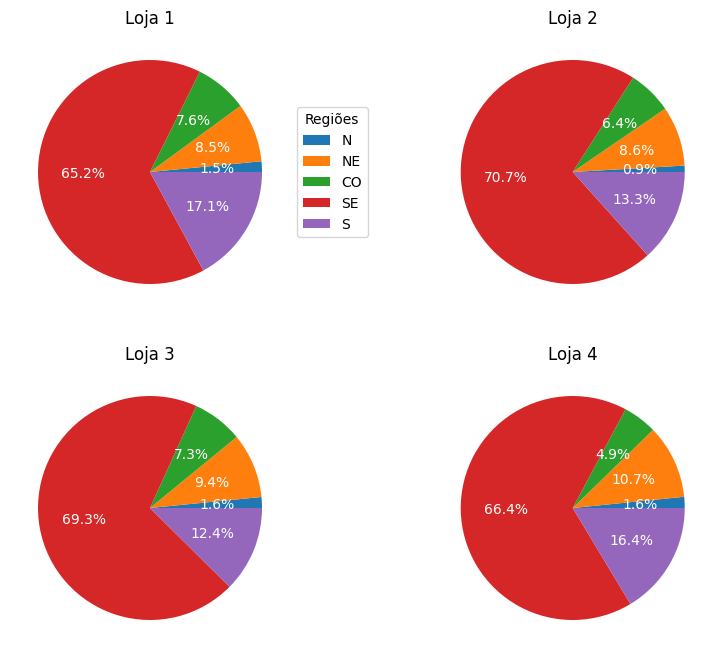

In [9]:
fig, axes = plt.subplots(2,2, figsize=(10, 8), subplot_kw=dict(aspect="equal"))
textprops=dict(color="w")
autopct='%1.1f%%'

axes[0, 0].pie([regiao[0] for regiao in faturamento_por_regiao.values()], autopct=autopct, textprops=textprops)
axes[0, 0].legend(regioes.keys(), title="Regiões", loc="center left", bbox_to_anchor=(1, 0, 0, 1))
axes[0, 0].set_title("Loja 1")

axes[0, 1].pie([regiao[1] for regiao in faturamento_por_regiao.values()], autopct=autopct, textprops=textprops)
axes[0, 1].set_title("Loja 2")

axes[1, 0].pie([regiao[2] for regiao in faturamento_por_regiao.values()], autopct=autopct, textprops=textprops)
axes[1, 0].set_title("Loja 3")

axes[1, 1].pie([regiao[3] for regiao in faturamento_por_regiao.values()], autopct=autopct, textprops=textprops)
axes[1, 1].set_title("Loja 4")

plt.show()

###2.4 Cálculo do ticket médio

In [10]:
def calcula_ticket_medio(store):
    faturamento = calcula_faturamento(store)
    return faturamento/len(store)

tickets_medios = []
for i, store in enumerate(store_data):
    ticket_medio = calcula_ticket_medio(store)
    print(f'O ticket médio da loja {i+1} foi de R$ {ticket_medio:.2f}.')
    tickets_medios.append(ticket_medio)

O ticket médio da loja 1 foi de R$ 650.49.
O ticket médio da loja 2 foi de R$ 630.97.
O ticket médio da loja 3 foi de R$ 620.61.
O ticket médio da loja 4 foi de R$ 587.15.


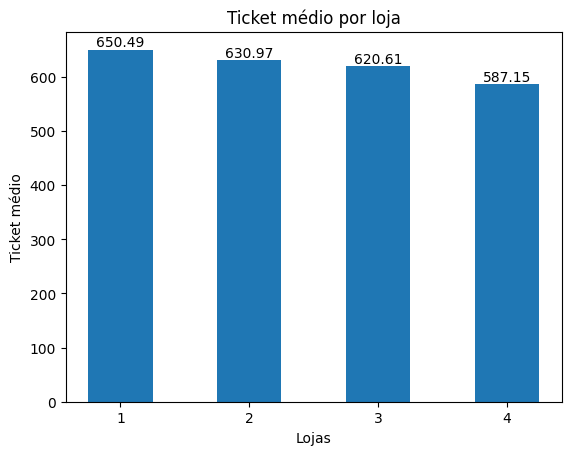

In [11]:
fig, ax = plt.subplots()

rects = ax.bar(['1', '2', '3', '4'], tickets_medios, width=0.5)
ax.set_xlabel("Lojas")
ax.set_ylabel("Ticket médio")
ax.bar_label(rects, fmt='%.2f', label_type='edge')
ax.set_title("Ticket médio por loja")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##3. Vendas por Categoria


In [12]:
def calcula_quantidade_por_categoria(store):
    quantidade = {}
    for sale in store:
        key = sale['Categoria do Produto']
        if key not in quantidade:
           quantidade[key] = 0
        quantidade[key] += 1
    return dict(sorted(quantidade.items()))

def calcula_faturamento_por_categoria(store):
    faturamento = {}
    for sale in store:
        key = sale['Categoria do Produto']
        if key not in faturamento:
           faturamento[key] = 0
        faturamento[key] += float(sale['Preço'])
    return dict(sorted(faturamento.items()))

def exibe_faturamento_por_categoria(faturamento_categorias, quantidades_categorias, categoria):
    print(f'Categoria: {categoria}')
    for i, income in enumerate(faturamento_categorias):
        print(f'O faturamento da loja {i+1} foi de {faturamento_categorias[i][categoria]:.2f} com {quantidades_categorias[i][categoria]} unidades a um ticket médio de {faturamento_categorias[i][categoria]/quantidades_categorias[i][categoria]:.2f}.')
    print('\n')

def calcula_faturamento_categorias(data):
    faturamentos = {}
    for i, store in enumerate(data):
        faturamento_categoria = calcula_faturamento_por_categoria(store)
        faturamentos = merge_dicts(faturamentos, faturamento_categoria)
    return faturamentos

def calcula_quantidade_categorias(data):
    quantidades = {}
    for i, store in enumerate(data):
        quantidade_categoria = calcula_quantidade_por_categoria(store)
        quantidades = merge_dicts(quantidades, quantidade_categoria)
    return quantidades

faturamentos = calcula_faturamento_categorias(store_data)
imprime_tabela(faturamentos)

+--------+--------------+--------------------+---------------+-------------------+-------------------------+----------+-----------+-------------------------+
|        |   brinquedos |   eletrodomesticos |   eletronicos |   esporte e lazer |   instrumentos musicais |   livros |    moveis |   utilidades domesticas |
+========+==============+====================+===============+===================+=========================+==========+===========+=========================+
| Loja 1 |     23993.78 |          484913.36 |     572659.23 |          52387.55 |               121731.69 | 11713.92 | 250178.11 |                16931.48 |
+--------+--------------+--------------------+---------------+-------------------+-------------------------+----------+-----------+-------------------------+
| Loja 2 |     21262.21 |          464758.13 |     547773.71 |          46326.09 |               139987.03 | 13454.35 | 235234.68 |                19662.86 |
+--------+--------------+--------------------+------

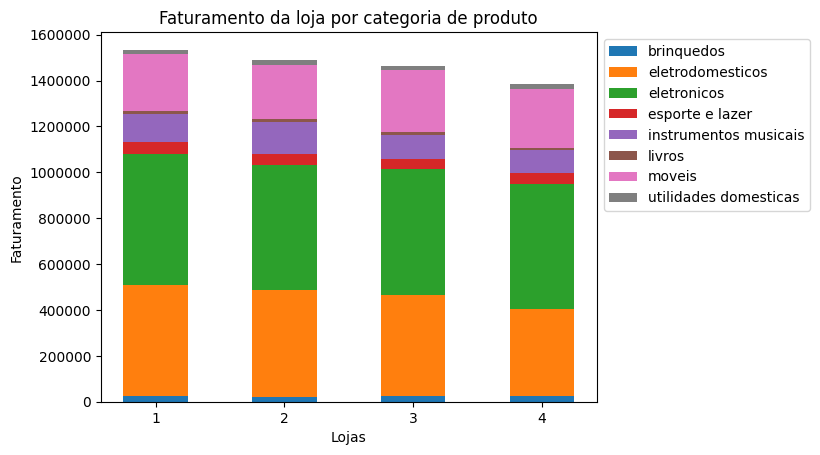

In [13]:
fig, ax = plt.subplots()
bottom = [0, 0, 0, 0]

for categoria, faturamento in faturamentos.items():
    p = ax.bar(['1', '2', '3', '4'], faturamento, width = 0.5, label=categoria, bottom=bottom)
    bottom = [x + y for x, y in zip(bottom, faturamento)]

ax.set_title("Faturamento da loja por categoria de produto")
ax.set_xlabel("Lojas")
ax.set_ylabel("Faturamento")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##4. Média de Avaliação das Lojas

In [14]:
def calcula_avaliacoes_por_loja(data):
    avaliacoes = {}
    for sale in data:
        key = sale['Avaliação da compra']
        if key not in avaliacoes:
            avaliacoes[key] = 0
        avaliacoes[key] += 1
    total = sum(float(key) * value for key, value in avaliacoes.items())
    avaliacao_media = total/sum(avaliacoes.values())
    return dict(sorted(avaliacoes.items())), avaliacao_media

def exibe_avaliacoes_medias(store_data):
    for i, store in enumerate(store_data):
        _, avaliacao_media = calcula_avaliacoes_por_loja(store)
        print(f'A avaliação média da loja {i+1} foi {round(avaliacao_media, 2):.2f}.')

avaliacoes, avaliacao_media = calcula_avaliacoes_por_loja(store_data[3])
exibe_avaliacoes_medias(store_data)

A avaliação média da loja 1 foi 3.98.
A avaliação média da loja 2 foi 4.04.
A avaliação média da loja 3 foi 4.05.
A avaliação média da loja 4 foi 4.00.


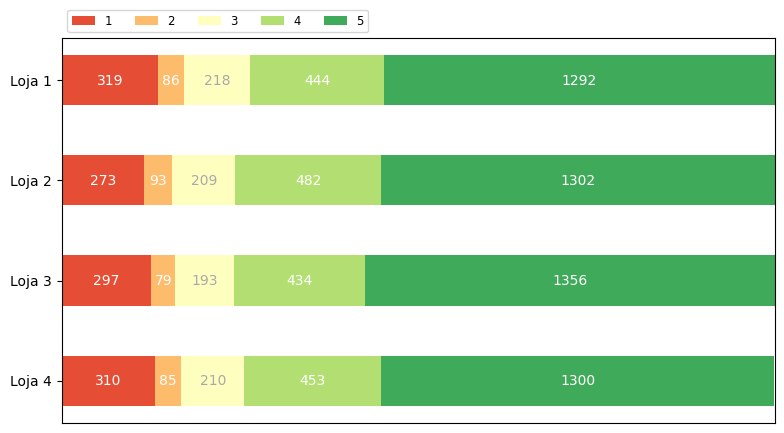

In [15]:
category_names = list(avaliacoes.keys())
results = {
    'Loja 1': list(calcula_avaliacoes_por_loja(store_data[0])[0].values()),
    'Loja 2': list(calcula_avaliacoes_por_loja(store_data[1])[0].values()),
    'Loja 3': list(calcula_avaliacoes_por_loja(store_data[2])[0].values()),
    'Loja 4': list(calcula_avaliacoes_por_loja(store_data[3])[0].values())
}

def linspace(start, stop, num):
    """Emula numpy.linspace"""
    if num == 1:
        return [start]
    step = (stop - start) / (num - 1)
    return [start + step * i for i in range(num)]

def cumsum(data):
    """Cálculo do acumulado linha a linha"""
    cumulative = []
    for row in data:
        acc = 0
        row_cumsum = []
        for val in row:
            acc += val
            row_cumsum.append(acc)
        cumulative.append(row_cumsum)
    return cumulative

def transpose(data):
    """Transpõe uma matriz 2D"""
    return list(map(list, zip(*data)))

def survey(results, category_names):
    labels = list(results.keys())
    data = list(results.values())
    data_cum = cumsum(data)

    # Emula colormap do matplotlib com linspace
    colormap = plt.colormaps['RdYlGn']
    category_colors = [colormap(x) for x in linspace(0.15, 0.85, len(category_names))]

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, max(sum(row) for row in data))

    transposed_data = transpose(data)
    transposed_cum = transpose(data_cum)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = transposed_data[i]
        starts = [cum - width for cum, width in zip(transposed_cum[i], widths)]
        rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)

    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    return fig, ax

survey(results, category_names)
plt.show()

##5. Produtos Mais e Menos Vendidos

In [16]:
def calcula_quantidade_por_produto(store):
    quantidade = {}
    for sale in store:
        key = sale['Produto']
        if key not in quantidade:
           quantidade[key] = 0
        quantidade[key] += 1
    return dict(sorted(quantidade.items()))

def obter_mais_vendidos(dicionario, qtde = 3):
    return dict(sorted(dicionario.items(), key = lambda item: item[1], reverse = True)[:qtde])

def obter_menos_vendidos(dicionario, qtde = 3):
    return dict(sorted(dicionario.items(), key = lambda item: item[1])[:qtde])

def exibe_mais_vendidos(data, qtde = 3):
    print('Produtos mais vendidos')
    print('-'*len('Produtos mais vendidos'))
    for i, store in enumerate(data):
        mais_vendidos = obter_mais_vendidos(calcula_quantidade_por_produto(store), qtde)
        print(f'Loja {i+1}:')
        for produto, quantidade in mais_vendidos.items():
            print(f'{produto}: {quantidade} unidades')
        print('')

def exibe_menos_vendidos(data, qtde = 3):
    print('Produtos menos vendidos')
    print('-'*len('Produtos menos vendidos'))
    for i, store in enumerate(data):
        menos_vendidos = obter_menos_vendidos(calcula_quantidade_por_produto(store), qtde)
        print(f'Loja {i+1}:')
        for produto, quantidade in menos_vendidos.items():
            print(f'{produto}: {quantidade} unidades')
        print('')

exibe_mais_vendidos(store_data)
print('')
exibe_menos_vendidos(store_data)


Produtos mais vendidos
----------------------
Loja 1:
Guarda roupas: 60 unidades
Micro-ondas: 60 unidades
TV Led UHD 4K: 60 unidades

Loja 2:
Iniciando em programação: 65 unidades
Micro-ondas: 62 unidades
Bateria: 61 unidades

Loja 3:
Kit banquetas: 57 unidades
Cama king: 56 unidades
Mesa de jantar: 56 unidades

Loja 4:
Cama box: 62 unidades
Faqueiro: 59 unidades
Cama king: 56 unidades


Produtos menos vendidos
-----------------------
Loja 1:
Celular ABXY: 33 unidades
Headset: 33 unidades
Panela de pressão: 35 unidades

Loja 2:
Jogo de tabuleiro: 32 unidades
Impressora: 34 unidades
Mesa de jantar: 34 unidades

Loja 3:
Blocos de montar: 35 unidades
Jogo de copos: 36 unidades
Micro-ondas: 36 unidades

Loja 4:
Guitarra: 33 unidades
Guarda roupas: 34 unidades
Violão: 37 unidades



##6. Frete Médio por Loja


In [17]:
def calcula_frete_medio(store):
    frete = 0
    for sale in store:
        frete += float(sale['Frete'])
    return frete/len(store)

def exibe_fretes(data):
    for i, store in enumerate(data):
        print(f'O frete médio da loja {i+1} foi de R$ {calcula_frete_medio(store):.2f}')

exibe_fretes(store_data)

O frete médio da loja 1 foi de R$ 34.69
O frete médio da loja 2 foi de R$ 33.62
O frete médio da loja 3 foi de R$ 33.07
O frete médio da loja 4 foi de R$ 31.28


##7. Recomendação

O Sr. João deveria **vender a Loja 4**.

A loja 4 tem o **menor faturamento (R$ 1,38 mi)**. Apesar de ter o melhor frete médio (R$ 31,28), não compensa a diferença de receita em relação às demais.

As avaliações também **não são muito superiores (4,00)**, ficando abaixo das lojas 2 e 3.

A loja 1, **mesmo com a pior avaliação (3,98)**, é a **líder em faturamento**, e eu não recomendaria o Sr. João a vendê-la.